In [ ]:
import pandas as pd
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import ElasticNet
import math
import warnings
from keras.layers.core import Dense 
from keras.models import Sequential
import tensorflow as tf
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import SCORERS
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import set_config
from imblearn.over_sampling import SMOTENC
from sklearn.feature_selection import RFECV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV

from keras.layers.core import Dense 
from keras.models import Sequential
import tensorflow as tf


drive.mount('/content/drive',force_remount=True)



Mounted at /content/drive


In [ ]:
warnings.simplefilter("ignore")

In [ ]:

tf.random.set_seed(0)

In [ ]:
ATM_test = pd.read_csv('/content/drive/MyDrive/ECON3203/ATM_test.csv')
ATM_train = pd.read_csv('/content/drive/MyDrive/ECON3203/ATM_training.csv')
y_train = ATM_train['Withdraw']
x_train = ATM_train.drop(['Withdraw'],axis=1)

y_test = ATM_test['Withdraw']
x_test = ATM_test.drop(['Withdraw'],axis=1)
 
scaling = StandardScaler().fit(x_train)
x_train[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x_train)
x_test[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x_test)

In [ ]:
ATM_train.describe()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
count,22000.000000,22000.000000,22000.00000,22000.000000,22000.000000,22000.000000,22000.000000
mean,7.316373,7.937455,0.70200,0.714091,0.102455,0.301591,54.652818
std,4.118692,3.673415,0.45739,0.451857,0.303252,0.458959,25.099767
min,0.800000,0.000000,0.00000,0.000000,0.000000,0.000000,11.668197
25%,1.050000,4.000000,0.00000,0.000000,0.000000,0.000000,18.500386
50%,9.890000,9.000000,1.00000,1.000000,0.000000,0.000000,68.240749
75%,10.070000,11.000000,1.00000,1.000000,0.000000,1.000000,71.345778
max,10.830000,17.000000,1.00000,1.000000,1.000000,1.000000,103.964065


In [ ]:
ATM_train.corr()

,Shops,ATMs,Downtown,Weekday,Center,High,Withdraw
Shops,1.000000,0.872903,0.999131,0.013014,0.000004,0.001820,0.985797
ATMs,0.872903,1.000000,0.873726,0.009766,-0.003306,-0.002616,0.824030
Downtown,0.999131,0.873726,1.000000,0.012664,-0.000101,0.001782,0.983574
Weekday,0.013014,0.009766,0.012664,1.000000,-0.007153,-0.006793,-0.050470
Center,0.000004,-0.003306,-0.000101,-0.007153,1.000000,0.010521,0.088103
High,0.001820,-0.002616,0.001782,-0.006793,0.010521,1.000000,0.021275
Withdraw,0.985797,0.824030,0.983574,-0.050470,0.088103,0.021275,1.000000


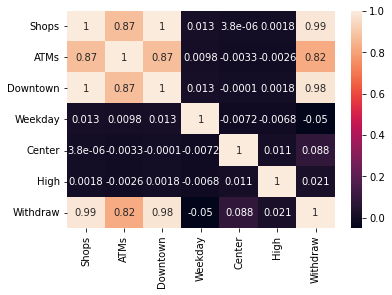

In [ ]:
sns.heatmap(ATM_train.corr(), annot=True)

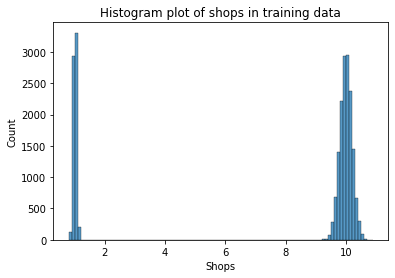

In [ ]:
sns.histplot(x ='Shops', data = ATM_train,binwidth = 0.1).set(title='Histogram plot of shops in training data')
plt.show()

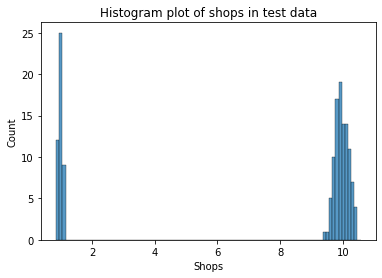

In [ ]:
sns.histplot(x ='Shops', data = ATM_test,binwidth = 0.1).set(title='Histogram plot of shops in test data')
plt.show()

[Text(0.5, 1.0, 'Histogram plot of Count in train data')]

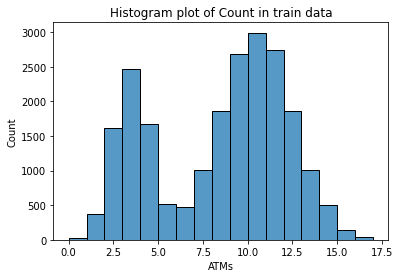

In [ ]:
sns.histplot(x ='ATMs', data = ATM_train,binwidth = 1).set(title='Histogram plot of Count in train data')


[Text(0.5, 1.0, 'Histogram plot of Count in test data')]

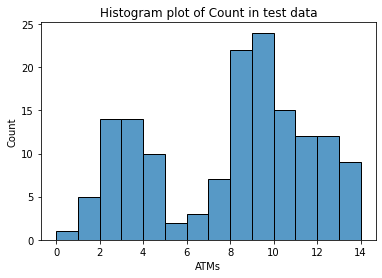

In [ ]:
sns.histplot(x ='ATMs', data = ATM_test,binwidth = 1).set(title='Histogram plot of Count in test data')


[Text(0.5, 1.0, 'Count of plot of Weekday in Train data')]

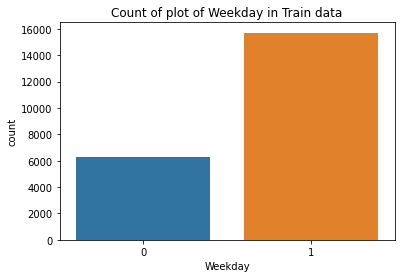

In [ ]:
sns.countplot(x ='Weekday', data = ATM_train).set(title='Count of plot of Weekday in Train data')


[Text(0.5, 1.0, 'Count of plot of Weekday in Test data')]

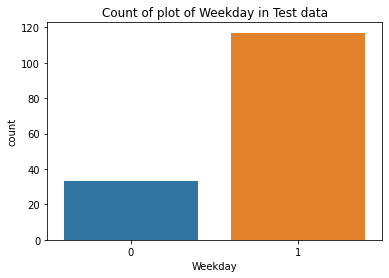

In [ ]:
sns.countplot(x ='Weekday', data = ATM_test).set(title='Count of plot of Weekday in Test data')




[Text(0.5, 1.0, 'Count of plot of Center in Train data')]

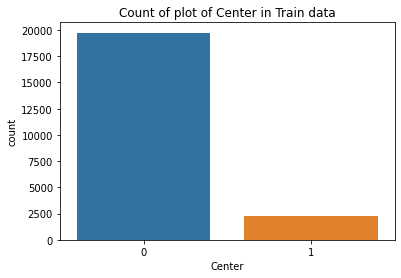

In [ ]:
sns.countplot(x ='Center', data = ATM_train).set(title='Count of plot of Center in Train data')



[Text(0.5, 1.0, 'Count of plot of Center in Test data')]

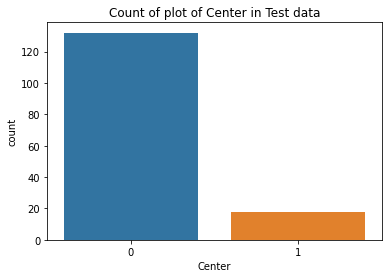

In [ ]:
sns.countplot(x ='Center', data = ATM_test).set(title='Count of plot of Center in Test data')


[Text(0.5, 1.0, 'Count of plot of High in Train data')]

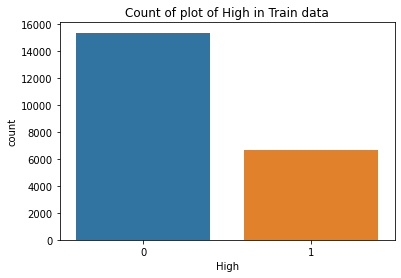

In [ ]:
sns.countplot(x ='High', data = ATM_train).set(title='Count of plot of High in Train data')


[Text(0.5, 1.0, 'Count of plot of High in Test data')]

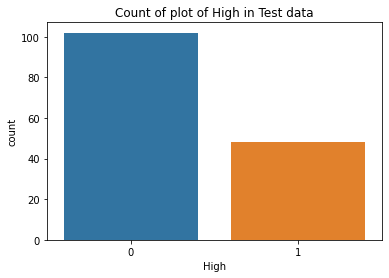

In [ ]:
sns.countplot(x ='High', data = ATM_test).set(title='Count of plot of High in Test data')


[Text(0.5, 1.0, 'Count of plot of ATMs in Train data')]

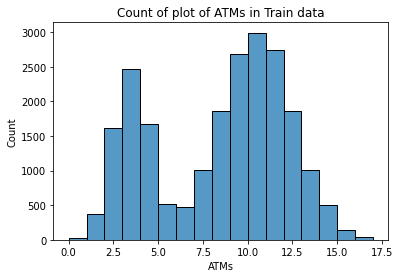

In [ ]:
sns.histplot(x ='ATMs', data = ATM_train,binwidth = 1).set(title='Count of plot of ATMs in Train data')


[Text(0.5, 1.0, 'Count of plot of ATMs in Test data')]

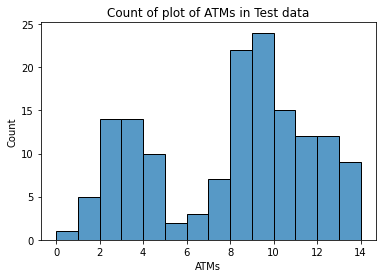

In [ ]:
sns.histplot(x ='ATMs', data = ATM_test,binwidth = 1).set(title='Count of plot of ATMs in Test data')


In [ ]:
predictors = ['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']
response = ['Withdraw']

In [ ]:
import statsmodels.formula.api as smf

formula = "Withdraw ~ Shops + ATMs + Downtown + Weekday + Center + High"

model_formula = smf.ols(formula = formula, data = ATM_train)

results_formula = model_formula.fit()
y_pred = results_formula.predict(ATM_test)
y_true = ATM_test['Withdraw']
test_error = mean_squared_error(y_true, y_pred)
print(test_error)
print(results_formula.summary())

7.40588444985482
                            OLS Regression Results                            
Dep. Variable:               Withdraw   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 3.656e+05
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        12:29:42   Log-Likelihood:                -51380.
No. Observations:               22000   AIC:                         1.028e+05
Df Residuals:                   21993   BIC:                         1.028e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.4284      0.111   

In [ ]:
cv = KFold(n_splits=5)
linear_scores = []
for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  linear = LinearRegression().fit(train_x,train_y)
  linear_pred = linear.predict(valid_x)
  linear_scores.append(mean_squared_error(valid_y, linear_pred))
  print("round ",fold, "LINEAR MSE:", round(mean_squared_error(valid_y, linear_pred), 5))
  
print("Average Cross Validation Linear Regression MSE:", round(sum(linear_scores)/len(linear_scores), 5))
print("TEST MSE", round(mean_squared_error(y_train, linear.predict(x_train)), 5))

round  0 LINEAR MSE: 6.4216
round  1 LINEAR MSE: 6.59567
round  2 LINEAR MSE: 6.26121
round  3 LINEAR MSE: 5.58558
round  4 LINEAR MSE: 6.43395
Average Cross Validation Linear Regression MSE: 6.2596
TEST MSE 6.25305


In [ ]:

alphas = np.exp(np.linspace(-10,20,500)).tolist() 
alphas.append(0)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(x_train, y_train)
print(f"Ridge Lambda: {ridge_cv.alpha_}")
ridge_cv_pred = ridge_cv.predict(x_test)
print("TEST MSE",mean_squared_error(y_test,ridge_cv_pred))
cv = KFold(n_splits=5)
ridge_scores = []
for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  ridge = RidgeCV(alphas=alphas, cv=5).fit(train_x,train_y)
  ridge_pred = ridge.predict(valid_x)
  ridge_scores.append(mean_squared_error(valid_y, ridge_pred))
  print("round ",fold, "RIDGE MSE:", round(mean_squared_error(valid_y, ridge_pred), 5))
print("Average Cross Validation RIDGE MSE:", round(sum(ridge_scores)/len(ridge_scores), 5))

Ridge Lambda: 0.0
TEST MSE 7.405884449854986
round  0 RIDGE MSE: 6.4216
round  1 RIDGE MSE: 6.59567
round  2 RIDGE MSE: 6.26121
round  3 RIDGE MSE: 5.58558
round  4 RIDGE MSE: 6.43395
Average Cross Validation RIDGE MSE: 6.2596


Minimum mse is 7.405884449854986 
Lambda for minimum mse is 0 


Text(0, 0.5, 'MSE')

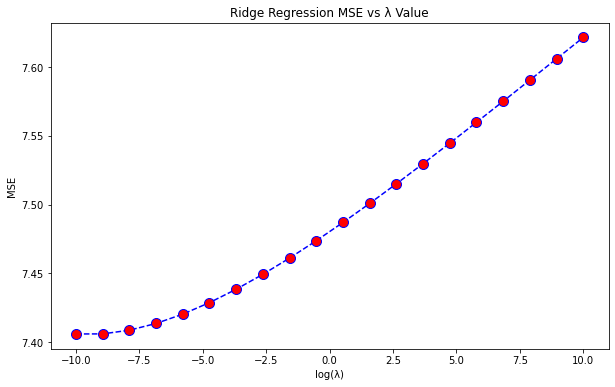

In [ ]:
error_rate = []
error_rate = []
alpha_list = np.linspace(0,10,20).tolist()
for i in  alpha_list:
  ridge_reg = Ridge(alpha = i)
  ridge_reg.fit(x_train,y_train)
  pred_i = ridge_reg.predict(x_test)
  error_rate.append(mean_squared_error(y_test,pred_i))
print(f"Minimum mse is {min(error_rate)} ")
print(f"Lambda for minimum mse is {int(alpha_list[error_rate.index(min(error_rate))])} ")
plt.figure(figsize=(10,6))
plt.plot(np.linspace(-10,10,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Ridge Regression MSE vs λ Value')
plt.xlabel('log(λ)')
plt.ylabel('MSE')

Minimum mse is 7.42543511738193 
Lambda for minimum mse is 0 


Text(0, 0.5, 'MSE')

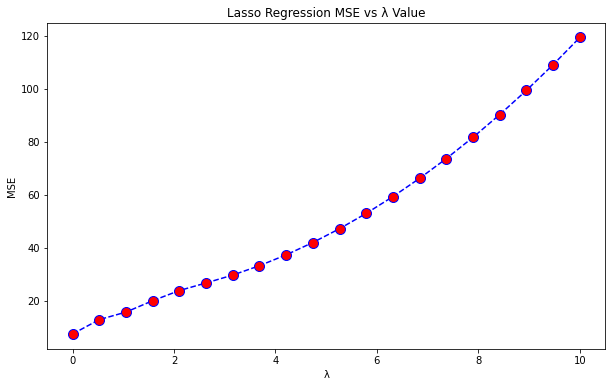

In [ ]:
error_rate = []
alpha_list = np.linspace(0,10,20).tolist()
for i in  alpha_list:
  lasso_reg = Lasso(alpha = i)
  lasso_reg.fit(x_train,y_train)
  pred_i = lasso_reg.predict(x_test)
  error_rate.append(mean_squared_error(y_test,pred_i))
print(f"Minimum mse is {min(error_rate)} ")
print(f"Lambda for minimum mse is {int(alpha_list[error_rate.index(min(error_rate))])} ")
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0,10,20),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Lasso Regression MSE vs λ Value')
plt.xlabel('λ')
plt.ylabel('MSE')

In [ ]:
# Reason this output gives different alpha value to above is because lasso from sklearn is not supposed to be used with zero regularisation as this causes issues with convergence.
lasso = LassoCV(cv=5)
lasso.fit(x_train,y_train )
print(f"LASSO Lambda: {lasso.alpha_}")
lasso_pred = lasso.predict(x_test)
print("TEST MSE",mean_squared_error(y_test,lasso_pred))
cv = KFold(n_splits=5)
# Default values are 5 fold split.
lasso_scores = []
ridge_scores = []
linear_scores = []
for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  lasso = LassoCV(cv=5).fit(train_x,train_y) 

  lasso_pred = lasso.predict(valid_x)
  lasso_scores.append(mean_squared_error(valid_y, lasso_pred))
  print(fold, "LASSO MSE:", round(mean_squared_error(valid_y, lasso_pred), 5))
print("Average LASSO Cross Validation MSE:", round(sum(lasso_scores)/len(lasso_scores), 5))

LASSO Lambda: 0.024742720714581393
TEST MSE 7.985219293347378
0 LASSO MSE: 6.89707
1 LASSO MSE: 7.0646
2 LASSO MSE: 6.79187
3 LASSO MSE: 6.08239
4 LASSO MSE: 6.8865
Average LASSO Cross Validation MSE: 6.74449


In [ ]:

enet_cv = ElasticNetCV(l1_ratio=[0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1], cv=5)
enet_cv.fit(x_train, y_train)
print(f"Best alpha {enet_cv.alpha_}")
print(f"Best l1_ratio {enet_cv.l1_ratio_}")
elastic_reg_pred = enet_cv.predict(x_test)
print("ENET TEST MSE :",mean_squared_error(y_test,elastic_reg_pred))
cv = KFold(n_splits=5)
# Default values are 5 fold split.
enet_scores = []

for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  enet = ElasticNetCV(l1_ratio=[0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1], cv=5).fit(train_x,train_y)
  enet_pred = enet.predict(valid_x)
  enet_scores.append(mean_squared_error(valid_y, enet_pred))
  print(fold, "ENET MSE:", round(mean_squared_error(valid_y, enet_pred), 5))
print("Average ENET MSE:", round(sum(enet_scores)/len(enet_scores), 5))

Best alpha 0.024742720714581393
Best l1_ratio 1.0
ENET TEST MSE : 7.985219293347378
0 ENET MSE: 6.89707
1 ENET MSE: 7.0646
2 ENET MSE: 6.79187
3 ENET MSE: 6.08239
4 ENET MSE: 6.8865
Average ENET MSE: 6.74449


Minimum index is 8 
Lamba value of k neighbour = 8 is 0.2724120439555672


Text(0, 0.5, 'Test MSE')

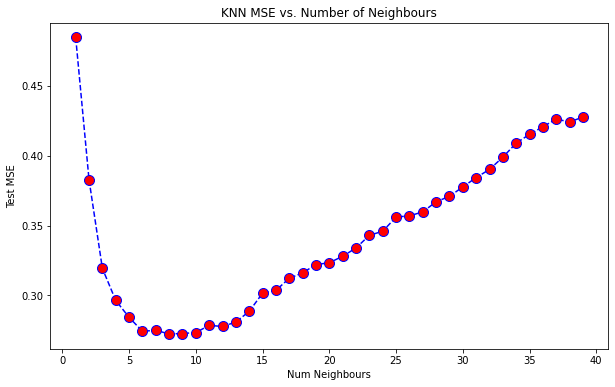

In [ ]:
error_rate = []
for i in range (1,40):
  KNN_reg = KNeighborsRegressor(n_neighbors=i)
  KNN_reg.fit(x_train,y_train)
  pred_i = KNN_reg.predict(x_test)
  error_rate.append(mean_squared_error(y_test,pred_i))
print(f"Minimum index is {error_rate.index(min(error_rate)) + 1} ")
print(f"Lamba value of k neighbour = {error_rate.index(min(error_rate)) + 1} is {min(error_rate)}")
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('KNN MSE vs. Number of Neighbours')
plt.xlabel('Num Neighbours')
plt.ylabel('Test MSE')

In [ ]:
  KNN_reg = KNeighborsRegressor(n_neighbors=7)
  KNN_reg.fit(x_train,y_train)
  pred_i = KNN_reg.predict(x_test)
  mean_squared_error(y_test,pred_i)

0.2750609347958794

In [ ]:
cv = KFold(n_splits=5)
# Default values are 5 fold split.
params4 = {'n_neighbors' : list(range(40)) }
alphas = np.exp(np.linspace(-10,20,500)).tolist()
alphas.append(0)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
knn_scores = []
enet_scores = []
lasso_scores = []
ridge_scores = []
linear_scores = []
for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  knn01 = GridSearchCV(KNeighborsRegressor(), params4, scoring='neg_mean_squared_error', cv=cv, refit=True).fit(train_x,train_y)
  enet = ElasticNetCV(l1_ratio=[0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99,1], cv=5).fit(train_x,train_y)
  lasso = LassoCV(cv=5).fit(train_x,train_y)
  ridge = RidgeCV(alphas=alphas, cv=5).fit(train_x,train_y)
  linear = LinearRegression().fit(train_x,train_y)
  knn_pred = knn01.best_estimator_.predict(valid_x)
  enet_pred = enet.predict(valid_x)
  lasso_pred = lasso.predict(valid_x)
  ridge_pred = ridge.predict(valid_x)
  linear_pred = linear.predict(valid_x)
  knn_scores.append(mean_squared_error(valid_y, knn_pred))
  enet_scores.append(mean_squared_error(valid_y, enet_pred))
  lasso_scores.append(mean_squared_error(valid_y, lasso_pred))
  ridge_scores.append(mean_squared_error(valid_y, ridge_pred))
  linear_scores.append(mean_squared_error(valid_y, linear_pred))
  print(fold, "KNN MSE:", round(mean_squared_error(valid_y, knn_pred), 5))
  print(fold, "ENET MSE:", round(mean_squared_error(valid_y, enet_pred), 5))
  print(fold, "LASSO MSE:", round(mean_squared_error(valid_y, lasso_pred), 5))
  print(fold, "RIDGE MSE:", round(mean_squared_error(valid_y, ridge_pred), 5))
  print(fold, "LINEAR MSE:", round(mean_squared_error(valid_y, linear_pred), 5))
print( "Average KNN MSE:", round(sum(knn_scores)/len(knn_scores),5))
print("Average ENET MSE:", round(sum(enet_scores)/len(enet_scores), 5))
print("Average LASSO MSE:", round(sum(lasso_scores)/len(lasso_scores), 5))
print("Average RIDGE MSE:", round(sum(ridge_scores)/len(ridge_scores), 5))
print("Average LINEAR MSE:", round(sum(linear_scores)/len(linear_scores), 5))

0 KNN MSE: 0.36152
0 ENET MSE: 6.89707
0 LASSO MSE: 6.89707
0 RIDGE MSE: 6.4216
0 LINEAR MSE: 6.4216
1 KNN MSE: 0.39151
1 ENET MSE: 7.0646
1 LASSO MSE: 7.0646
1 RIDGE MSE: 6.59567
1 LINEAR MSE: 6.59567
2 KNN MSE: 0.3806
2 ENET MSE: 6.79187
2 LASSO MSE: 6.79187
2 RIDGE MSE: 6.26121
2 LINEAR MSE: 6.26121
3 KNN MSE: 0.36847
3 ENET MSE: 6.08239
3 LASSO MSE: 6.08239
3 RIDGE MSE: 5.58558
3 LINEAR MSE: 5.58558
4 KNN MSE: 0.36607
4 ENET MSE: 6.8865
4 LASSO MSE: 6.8865
4 RIDGE MSE: 6.43395
4 LINEAR MSE: 6.43395
Average KNN MSE: 0.37363
Average ENET MSE: 6.74449
Average LASSO MSE: 6.74449
Average RIDGE MSE: 6.2596
Average LINEAR MSE: 6.2596


In [ ]:
KNN_reg = KNeighborsRegressor(n_neighbors=8)

KNN_reg.fit(x_train,y_train)
KNN_reg_pred = KNN_reg.predict(x_test)
print("KNN Test MSE ",mean_squared_error(y_test,KNN_reg_pred))
cv = KFold(n_splits=5)
# Default values are 5 fold split.
params4 = {'n_neighbors' : list(range(40)) }
knn_scores = []
for fold, (train_idx,test_idx) in enumerate(cv.split(x_train,y_train)):
  train_x, valid_x = x_train.iloc[train_idx], x_train.iloc[test_idx]
  train_y, valid_y = y_train.iloc[train_idx], y_train.iloc[test_idx]
  knn01 = GridSearchCV(KNeighborsRegressor(), params4, scoring='neg_mean_squared_error', cv=cv, refit=True).fit(train_x,train_y)
  knn_pred = knn01.best_estimator_.predict(valid_x)
  knn_scores.append(mean_squared_error(valid_y, knn_pred))
  print(fold, "KNN MSE:", round(mean_squared_error(valid_y, knn_pred), 5))
  print(knn01.best_estimator_)
print( "Average KNN Cross-Validation MSE:", round(sum(knn_scores)/len(knn_scores),5))

KNN Test MSE  0.2724120439555672
0 KNN MSE: 0.36152
KNeighborsRegressor(n_neighbors=4)
1 KNN MSE: 0.39151
KNeighborsRegressor(n_neighbors=4)
2 KNN MSE: 0.3806
KNeighborsRegressor(n_neighbors=4)
3 KNN MSE: 0.36847
KNeighborsRegressor(n_neighbors=4)
4 KNN MSE: 0.36607
KNeighborsRegressor(n_neighbors=4)
Average KNN Cross-Validation MSE: 0.37363


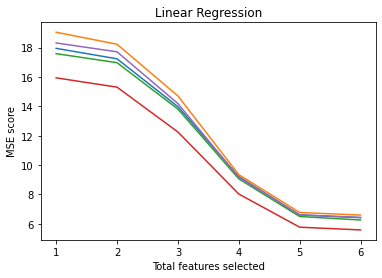

In [ ]:

lin_reg = RFECV(LinearRegression(), step=1, scoring='neg_mean_squared_error', cv=5)
lin_reg.fit(x_train, y_train)
lin_reg_pred = lin_reg.predict(x_test)
plt.title('Linear Regression')
plt.xlabel('Total features selected')
plt.ylabel('MSE score')
plt.plot(range(1, len(lin_reg.grid_scores_) + 1), -lin_reg.grid_scores_)
plt.show()
x_train_lin_reg = lin_reg.transform(x_train)

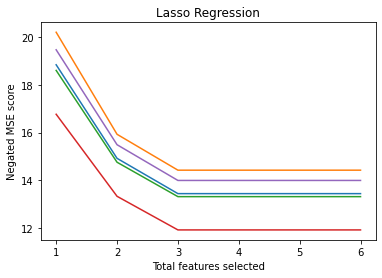

In [ ]:
# Lasso already takes the number of features into account through lambda values.
lasso_reg = RFECV(Lasso(), step=1, scoring='neg_mean_squared_error', cv=5)
lasso_reg.fit(x_train, y_train)
lasso_reg_pred = lasso_reg.predict(x_test)
plt.title('Lasso Regression')
plt.xlabel('Total features selected')
plt.ylabel('Negated MSE score')
plt.plot(range(1, len(lasso_reg.grid_scores_) + 1), -lasso_reg.grid_scores_)
plt.show()
x_train_lasso_reg = lasso_reg.transform(x_train)

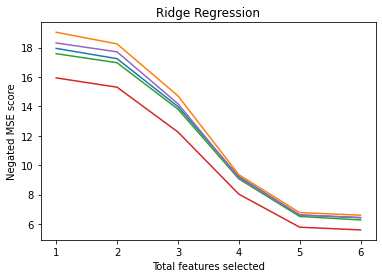

In [ ]:
# Ridge already takes the number of features into account through lambda values.
ridge_reg = RFECV(Ridge(), step=1, scoring='neg_mean_squared_error', cv=5)
ridge_reg.fit(x_train, y_train)
ridge_reg_pred = ridge_reg.predict(x_test)
plt.title('Ridge Regression')
plt.xlabel('Total features selected')
plt.ylabel('Negated MSE score')
plt.plot(range(1, len(ridge_reg.grid_scores_) + 1),- ridge_reg.grid_scores_)
plt.show()
x_train_ridge_reg = ridge_reg.transform(x_train)

In [ ]:
ATM_test = pd.read_csv('ATM_test.csv')
ATM_train = pd.read_csv('ATM_training.csv')

train_size = int(len(ATM_train)*0.8)
x = ATM_train.drop(['Withdraw'],axis=1)
y = ATM_train['Withdraw']
scaling = StandardScaler().fit(x)
x[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x)

x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

NN1 = Sequential()
NN1.add(Dense(14, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN1.add(Dense(6, input_dim = 10, activation='relu'))
NN1.add(Dense(1))
NN1.compile(loss='mean_squared_error', optimizer='adam')




In [ ]:
NN1.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_81 (Dense)            (None, 14)                98        
                                                                 
 dense_82 (Dense)            (None, 6)                 90        
                                                                 
 dense_83 (Dense)            (None, 1)                 7         
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN1.fit(x_train, y_train, epochs=100, batch_size=20 , verbose=1)

Epoch 1/100
880/880 [==============================] - 2s 2ms/step - loss: 1074.9432
Epoch 2/100
880/880 [==============================] - 2s 2ms/step - loss: 8.3560
Epoch 3/100
880/880 [==============================] - 2s 2ms/step - loss: 3.8317
Epoch 4/100
880/880 [==============================] - 2s 2ms/step - loss: 2.0817
Epoch 5/100
880/880 [==============================] - 2s 2ms/step - loss: 1.1870
Epoch 6/100
880/880 [==============================] - 4s 4ms/step - loss: 0.8487
Epoch 7/100
880/880 [==============================] - 4s 5ms/step - loss: 0.6597
Epoch 8/100
880/880 [==============================] - 5s 5ms/step - loss: 0.5350
Epoch 9/100
880/880 [==============================] - 2s 2ms/step - loss: 0.4410
Epoch 10/100
880/880 [==============================] - 2s 2ms/step - loss: 0.3778
Epoch 11/100
880/880 [==============================] - 2s 2ms/step - loss: 0.3445
Epoch 12/100
880/880 [==============================] - 2s 2ms/step - loss: 0.3262
Epoch 13/1

In [ ]:
allPredict1 = NN1.predict(x)


688/688 [==============================] - 1s 1ms/step


In [ ]:
trainScore_not_scaled1 = 0
trainScore_not_scaled1 = (mean_squared_error(y[:train_size], allPredict1[:train_size, 0]))
print('Model 1: Training Data MSE on original scale: {0:.4f}'.format(trainScore_not_scaled1))

Model 1: Training Data MSE on original scale: 0.2735


In [ ]:
valScore_not_scaled1 = 0
valScore_not_scaled1 = (mean_squared_error(y[train_size:], allPredict1[train_size:,0]))
print('Model 1: Validation Data MSE original scale: {0:.4f}'.format(valScore_not_scaled1))

Model 1: Validation Data MSE original scale: 0.2678


In [ ]:
ATM_test = pd.read_csv('ATM_test.csv')

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x_test)
allPredict1 = NN1.predict(x_test)
test_error = (mean_squared_error(y_test,allPredict1 ))
print('Model 1: Test Data MSE original scale: {0:.4f}'.format(test_error))

5/5 [==============================] - 0s 3ms/step
Model 1: Test Data MSE on original scale: 0.2484


In [ ]:
ATM_test = pd.read_csv('ATM_test.csv')
ATM_train = pd.read_csv('ATM_training.csv')

train_size = int(len(ATM_train)*0.8)
x = ATM_train.drop(['Withdraw'],axis=1)
y = ATM_train['Withdraw']
scaling = StandardScaler().fit(x)
x[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x)

x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

NN2 = Sequential()
NN2.add(Dense(20, input_dim = x_train.shape[1], activation='relu'))
NN2.add(Dense(1))
NN2.compile(loss='mean_squared_error', optimizer='adam')



In [ ]:
NN2.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_84 (Dense)            (None, 20)                140       
                                                                 
 dense_85 (Dense)            (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN2.fit(x_train, y_train, epochs=100, batch_size=20 , verbose=1)

Epoch 1/100
880/880 [==============================] - 2s 2ms/step - loss: 2243.0017
Epoch 2/100
880/880 [==============================] - 2s 2ms/step - loss: 168.8527
Epoch 3/100
880/880 [==============================] - 1s 2ms/step - loss: 30.0997
Epoch 4/100
880/880 [==============================] - 2s 2ms/step - loss: 7.3581
Epoch 5/100
880/880 [==============================] - 1s 2ms/step - loss: 3.1412
Epoch 6/100
880/880 [==============================] - 2s 2ms/step - loss: 1.5881
Epoch 7/100
880/880 [==============================] - 2s 2ms/step - loss: 0.8858
Epoch 8/100
880/880 [==============================] - 1s 2ms/step - loss: 0.6435
Epoch 9/100
880/880 [==============================] - 1s 2ms/step - loss: 0.5439
Epoch 10/100
880/880 [==============================] - 1s 2ms/step - loss: 0.4808
Epoch 11/100
880/880 [==============================] - 2s 3ms/step - loss: 0.4312
Epoch 12/100
880/880 [==============================] - 1s 2ms/step - loss: 0.3866
Epoch 1

In [ ]:
allPredict2 = NN2.predict(x)


688/688 [==============================] - 1s 1ms/step


In [ ]:
trainScore_not_scaled2 = 0
trainScore_not_scaled2 = (mean_squared_error(y[:train_size], allPredict2[:train_size, 0]))
print('Model 2: Training Data MSE on original scale: {0:.4f}'.format(trainScore_not_scaled2))

Model 2: Training Data MSE on original scale: 0.2637


In [ ]:
valScore_not_scaled2 = 0
valScore_not_scaled2 = (mean_squared_error(y[train_size:], allPredict2[train_size:,0]))
print('Model 2: Validation Data MSE original scale: {0:.4f}'.format(valScore_not_scaled2))

Model 2: Validation Data MSE original scale: 0.2591


In [ ]:
ATM_test = pd.read_csv('ATM_test.csv')

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x_test)
allPredict2 = NN2.predict(x_test)
test_error2 = (mean_squared_error(y_test,allPredict2 ))
print('Model 2: Test Data MSE original scale: {0:.4f}'.format(test_error2))

5/5 [==============================] - 0s 3ms/step
Model 2: Test Data MSE on original scale: 0.2413


In [ ]:
ATM_test = pd.read_csv('ATM_test.csv')
ATM_train = pd.read_csv('ATM_training.csv')

train_size = int(len(ATM_train)*0.8)
x = ATM_train.drop(['Withdraw'],axis=1)
y = ATM_train['Withdraw']
scaling = StandardScaler().fit(x)
x[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x)

x_train = x[:train_size]
x_test = x[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

NN3 = Sequential()
NN3.add(Dense(10, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))
NN3.add(Dense(10, input_dim = 10, activation='relu'))
NN3.add(Dense(1))
NN3.compile(loss='mean_squared_error', optimizer='adam')


In [ ]:
NN3.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 10)                70        
                                                                 
 dense_90 (Dense)            (None, 10)                110       
                                                                 
 dense_91 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [ ]:
NN3.fit(x_train, y_train, epochs=100, batch_size=20 , verbose=1)

Epoch 1/100
880/880 [==============================] - 2s 2ms/step - loss: 1194.3407
Epoch 2/100
880/880 [==============================] - 2s 2ms/step - loss: 10.4826
Epoch 3/100
880/880 [==============================] - 2s 2ms/step - loss: 3.3560
Epoch 4/100
880/880 [==============================] - 2s 2ms/step - loss: 1.6853
Epoch 5/100
880/880 [==============================] - 2s 2ms/step - loss: 1.1797
Epoch 6/100
880/880 [==============================] - 2s 2ms/step - loss: 0.9395
Epoch 7/100
880/880 [==============================] - 2s 2ms/step - loss: 0.7764
Epoch 8/100
880/880 [==============================] - 2s 2ms/step - loss: 0.6266
Epoch 9/100
880/880 [==============================] - 3s 4ms/step - loss: 0.5004
Epoch 10/100
880/880 [==============================] - 3s 3ms/step - loss: 0.4063
Epoch 11/100
880/880 [==============================] - 3s 4ms/step - loss: 0.3452
Epoch 12/100
880/880 [==============================] - 4s 5ms/step - loss: 0.3096
Epoch 13/

In [ ]:
allPredict3 = NN3.predict(x)

688/688 [==============================] - 1s 2ms/step


In [ ]:
trainScore_not_scaled3 = 0
trainScore_not_scaled3 = (mean_squared_error(y[:train_size], allPredict3[:train_size, 0]))
print('Model 3: Training Data MSE on original scale: {0:.4f}'.format(trainScore_not_scaled3))

Model 3: Training Data MSE on original scale: 0.2746


In [ ]:
valScore_not_scaled3 = 0
valScore_not_scaled3 = (mean_squared_error(y[train_size:], allPredict3[train_size:,0]))
print('Model 3: Validation Data MSE original scale: {0:.4f}'.format(valScore_not_scaled3))

Model 3: Validation Data MSE original scale: 0.2667


In [ ]:
ATM_test = pd.read_csv('/content/drive/MyDrive/ECON3203/ATM_test.csv')

x_test = ATM_test.drop(['Withdraw'],axis=1)
y_test = ATM_test['Withdraw']
x_test[['Shops', 'ATMs', 'Downtown', 'Weekday', 'Center', 'High']] = scaling.transform(x_test)
allPredict3 = NN3.predict(x_test)
test_error3 = (mean_squared_error(y_test,allPredict3))
print('Model 3: Test Data MSE original scale: {0:.4f}'.format(test_error3))

5/5 [==============================] - 0s 3ms/step
Model 3: Test Data MSE on original scale: 0.2436
